**Engineering Data and linear model for 1 week assignment**





**1. Concrete Compressive Strength Data Set**





In [ ]:
# given the above dataset, our objective is you will be able to use the Linear Regression module within sci-kit learn as a black box as demonstrated within the Tutorial class.
# packehe uses- numpy, matplotlib, seaborn, pandas and sci-kit learn packeges

**In this tutorial we will learn how to use linear regression module within sci-kit learn packege.**


**For this we will proceed as follows**



**Step-1**

we will download the dataset from given link.

**Step-2**

explore the data set, means is there any null value in dataset etc.. 

**Step-3**

Split the train, test data in the ratio of 70 and 30.

**Step-4**

BUILDING A LINEAR MODEL

Dividing into X and Y sets for the model building

In [ ]:
# How to import dataset from local machine to Google Colab

#Programming Homework 1

                    Assignment 1
                   Linear Regression 

Tools to use:


1.   Python programming language
2.   Packages to use numpy, matplotlib, seaborn, pandas and sci-kit learn 



          

The given Concrete Compressive Strength dataset is divided into Training, Test dataset using a 70:30 ratio. (For the downloading of the dataset please refer to this **Link**.


The first 8 columns indicate features and the last ‘ column Concrete compressive strength(MPa, megapascals)’ indicates Target.


Use the sci-kit learn library for fitting the linear regression model.Use R-squared value ( coefficient of determination) and mean Square error as evaluation metrics.


Using the trained model, predict the value of ‘Concrete compressive strength(MPa, megapascals)’for the given data in the submission.csv file. Upload the sumission.csv file.

**Obtain the following values**.


*   Mean Squared error and R-squared value for training data and test data respectively.
*   plot the scatter plot for ytrue against ypredicted for training data and validation respectively.



    
























In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
df=pd.read_excel('/content/gdrive/MyDrive/Machine learning for engineering for science application./Concrete_Data.xls')

In [ ]:
df.head()

Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
0                                              676.0         28   
1                                              676.0         28   
2                                              594.0        270   
3                                              594.0        365   
4                                              825.5        360   

   Concrete compressive strength(MPa, megapascals)   
0                                         79.986111  
1                                         61.887366  
2                                         40.269535  
3                                         41.052780  
4                                         44.296075

In [ ]:
df.rename(columns={'Concrete compressive strength(MPa, megapascals)': 'Concrete compressive strength'}, inplace=True)

In [ ]:
df.tail()

Cement (component 1)(kg in a m^3 mixture)  \
1025                                      276.4   
1026                                      322.2   
1027                                      148.5   
1028                                      159.1   
1029                                      260.9   

      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
1025                                              116.0       
1026                                                0.0       
1027                                              139.4       
1028                                              186.7       
1029                                              100.5       

      Fly Ash (component 3)(kg in a m^3 mixture)  \
1025                                        90.3   
1026                                       115.6   
1027                                       108.6   
1028                                         0.0   
1029                                        78.3   

      Water  (component 4)(kg in a m^3 mixture)  \
1025                                      179.6   
1026                                      196.0   
1027                                      192.7   
1028                                      175.6   
1029                                      200.6   

      Superplasticizer (component 5)(kg in a m^3 mixture)  \
1025                                                8.9     
1026                                               10.4     
1027                                                6.1     
1028                                               11.3     
1029                                                8.6     

      Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
1025                                              870.1      
1026                                              817.9      
1027                                              892.4      
1028                                              989.6      
1029                                              864.5      

      Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
1025                                              768.3         28   
1026                                              813.4         28   
1027                                              780.0         28   
1028                                              788.9         28   
1029                                              761.5         28   

      Concrete compressive strength(MPa, megapascals)   
1025                                         44.284354  
1026                                         31.178794  
1027                                         23.696601  
1028                                         32.768036  
1029                                         32.401235

**Breaf intoductuion about data**

Data Set Information:

Number of instances 1030

Number of Attributes 9

Attribute breakdown 8 quantitative input variables, and 1 quantitative output variable

Missing Attribute Values None

**Input variable (Indenpendent variable)** 

*   Cement (kg in a m3 mixture) 
*   Blast Furnace Slag (kg in a m3 mixture)
*   Fly Ash 
*   Water
*   Superplasticizer
*   Coarse Aggregate
*   Fine Aggregate
*   Age

**Target Variable (Dependent variable)**


*   Concrete compressive strength


 





**Overview of the Model**

*   NULL/MISSING values
*   Checking the duplicate values
*   Creating Dummy Variables
*   Spliting the data into 3 part( train ,test, validation)
*   Building the linear model









In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [ ]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [ ]:
df.describe()

Cement (component 1)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  281.165631   
std                                   104.507142   
min                                   102.000000   
25%                                   192.375000   
50%                                   272.900000   
75%                                   350.000000   
max                                   540.000000   

       Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
count                                        1030.000000       
mean                                           73.895485       
std                                            86.279104       
min                                             0.000000       
25%                                             0.000000       
50%                                            22.000000       
75%                                           142.950000       
max                                           359.400000       

       Fly Ash (component 3)(kg in a m^3 mixture)  \
count                                 1030.000000   
mean                                    54.187136   
std                                     63.996469   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                    118.270000   
max                                    200.100000   

       Water  (component 4)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  181.566359   
std                                    21.355567   
min                                   121.750000   
25%                                   164.900000   
50%                                   185.000000   
75%                                   192.000000   
max                                   247.000000   

       Superplasticizer (component 5)(kg in a m^3 mixture)  \
count                                        1030.000000     
mean                                            6.203112     
std                                             5.973492     
min                                             0.000000     
25%                                             0.000000     
50%                                             6.350000     
75%                                            10.160000     
max                                            32.200000     

       Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
count                                        1030.000000      
mean                                          972.918592      
std                                            77.753818      
min                                           801.000000      
25%                                           932.000000      
50%                                           968.000000      
75%                                          1029.400000      
max                                          1145.000000      

       Fine Aggregate (component 7)(kg in a m^3 mixture)    Age (day)  \
count                                        1030.000000  1030.000000   
mean                                          773.578883    45.662136   
std                                            80.175427    63.169912   
min                                           594.000000     1.000000   
25%                                           730.950000     7.000000   
50%                                           779.510000    28.000000   
75%                                           824.000000    56.000000   
max                                           992.600000   365.000000   

       Concrete compressive strength(MPa, megapascals)   
count                                       1030.000000  
mean                                          35.817836  
std                                           16.705679

In [ ]:
print(df.shape)

(1030, 9)


**SPLITTING THE DATA**



*   Splitting the data to Train,Test, validate : - We will now split the data into train and test (70:30ratio)
*   We will use train_test_split method from sklearn



In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test= train_test_split(df, train_size = 0.70, test_size = 30, random_state = 42)

BUILDING A LINEAR MODEL

Dividing into X and Y sets for the model building 

In [ ]:
# why we doing this x_train and y_train split
# because for traing linear regression it require features as well as lebel
# x_train is features and y_train is lebel.
# X_train is all the instance with attributes, y_train is the label of each instance.

X_train = df_train.drop(['Concrete compressive strength(MPa, megapascals) '],axis=1)
Y_train = df_train['Concrete compressive strength(MPa, megapascals) ']
X_test = df_test.drop(['Concrete compressive strength(MPa, megapascals) '],axis=1)
Y_test = df_test['Concrete compressive strength(MPa, megapascals) ']
          

In [ ]:
X_train

Cement (component 1)(kg in a m^3 mixture)  \
394                                     405.00   
536                                     393.00   
720                                     203.50   
333                                     246.83   
409                                     167.35   
..                                         ...   
186                                     222.36   
123                                     425.00   
888                                     153.00   
608                                     236.00   
143                                     375.00   

     Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
394                                                0.0       
536                                                0.0       
720                                              305.3       
333                                                0.0       
409                                              129.9       
..                                                 ...       
186                                                0.0       
123                                              106.3       
888                                              145.0       
608                                                0.0       
143                                               93.8       

     Fly Ash (component 3)(kg in a m^3 mixture)  \
394                                        0.00   
536                                        0.00   
720                                        0.00   
333                                      125.08   
409                                      128.62   
..                                          ...   
186                                       96.67   
123                                        0.00   
888                                        0.00   
608                                        0.00   
143                                        0.00   

     Water  (component 4)(kg in a m^3 mixture)  \
394                                     175.00   
536                                     192.00   
720                                     203.50   
333                                     143.30   
409                                     175.46   
..                                         ...   
186                                     189.29   
123                                     153.50   
888                                     178.00   
608                                     194.00   
143                                     126.60   

     Superplasticizer (component 5)(kg in a m^3 mixture)  \
394                                               0.00     
536                                               0.00     
720                                               0.00     
333                                              11.99     
409                                               7.79     
..                                                 ...     
186                                               4.46     
123                                              16.50     
888                                               8.00     
608                                               0.00     
143                                              23.40     

     Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
394                                            1120.00      
536                                             940.60      
720                                             963.40      
333                                            1086.80      
409                                            1006.30      
..                                                 ...      
186                                             967.08      
123                                             852.10      
888                                            1000.00      
608                                             968.00      
143                                             852.1

In [ ]:
Y_train

394    52.303649
536    39.604880
720    51.863764
333    66.424118
409    14.940945
         ...    
186    24.890084
123    60.294676
888    19.008853
608    21.946021
143    60.198150
Name: Concrete compressive strength(MPa, megapascals) , Length: 721, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
predictions = lin_reg.predict(X_test)

In [ ]:
#The Mean Squared Error measures how close a regression line is to a set of data points.
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [ ]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

In [ ]:
mae, mse, rmse, r_squared = evaluation(Y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

MAE: 7.494374562940593
MSE: 95.85105412839181
RMSE: 9.790355158439954
R2 Score: 0.6035462454801581
------------------------------


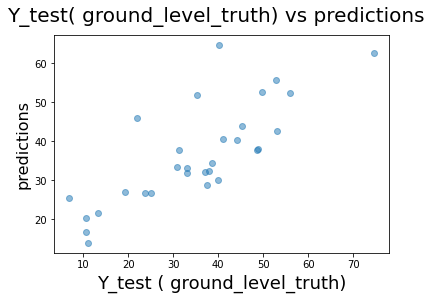

In [ ]:

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(Y_test, predictions, alpha=.5)
fig.suptitle('Y_test( ground_level_truth) vs predictions', fontsize = 20)          # Plot heading 
plt.xlabel('Y_test ( ground_level_truth)', fontsize = 18)                          # X-label
plt.ylabel('predictions', fontsize = 16) 
plt.show()